In [59]:
import pandas as pd
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

import TMQGP as tm
import QuarkTM

import matplotlib
matplotlib.style.use('publication')
import os

import h5py

from numpy import *

In [60]:
fname1 = '/home/const/Numerics/TMQGP/ipy/TMQGP/run/4ch_LO_test/170/iter_0.hdf5'
fname2 = './old_HI/0.00/170/iter_0.hdf5'
fname1 = '/home/const/Numerics/TMQGP/ipy/TMQGP/run/4ch_LO_old/170/iter_0.hdf5'

In [61]:
df1 = h5py.File(fname1)
df2 = h5py.File(fname2)

In [62]:
erange = linspace(-5, 5, 201)
erange2b = linspace(0, 10, 1501)

In [63]:
erange1 = linspace(-5, 5, 101)

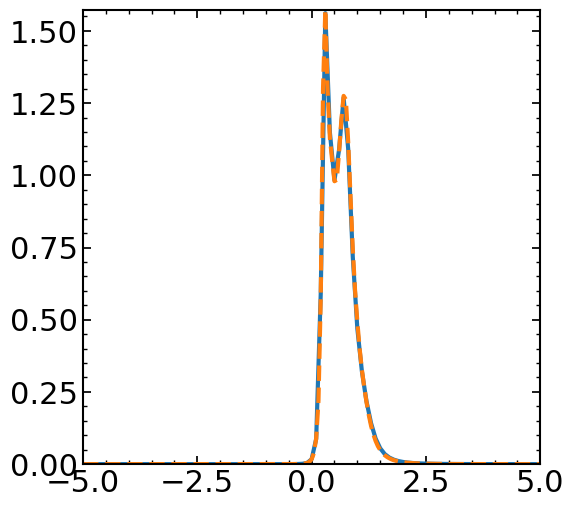

In [64]:
plt.plot(erange1, -1/pi*imag(df1['Q']['G'][:, 0]))
plt.plot(erange, -1/pi*imag(df2['Q']['G'][:, 0]), ls='--')


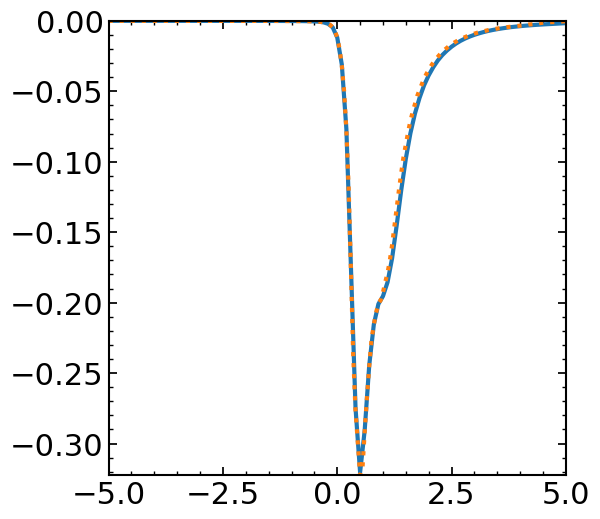

In [65]:
plt.plot(erange1, imag(df1['Q']['S'][:, 0]))
plt.plot(erange, imag(df2['Q']['S'][:, 0]), ls=':')


In [66]:
erange2b = linspace(0, 10, 1501)

[]

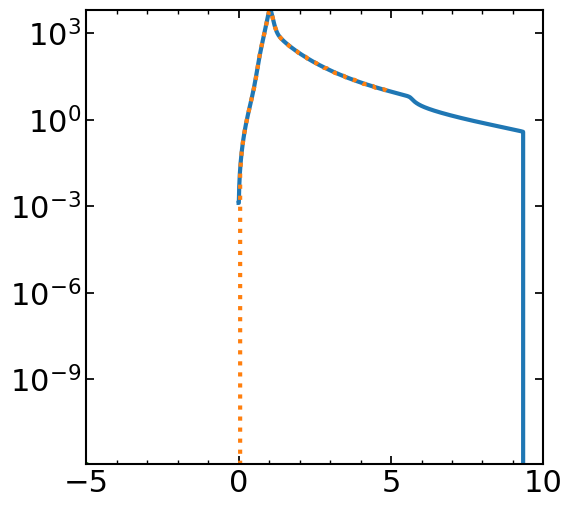

In [67]:
plt.plot(erange2b, -imag(df1['TM']['qa1']['0'][:, 0]))
plt.plot(erange, -imag(df2['TM']['qa1']['0'][:, 0]), ls=':')
plt.plot(erange, imag(df2['Q']['S'][:, 0]))

plt.semilogy()

In [68]:
qrange2b = linspace(0, 10, 501)

In [69]:
qrange2b[50]

1.0

In [70]:
qrange = linspace

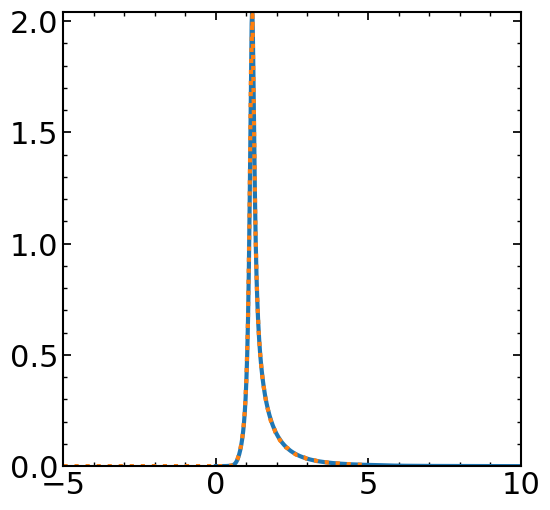

In [71]:
plt.plot(erange2b, -imag(df1['TM']['qa1']['1'][:, 50]))
plt.plot(erange, -imag(df2['TM']['qa1']['1'][:, 10]), ls=':')
# plt.plot(erange, imag(df2['Q']['S'][:, 0]))

# plt.semilogy()

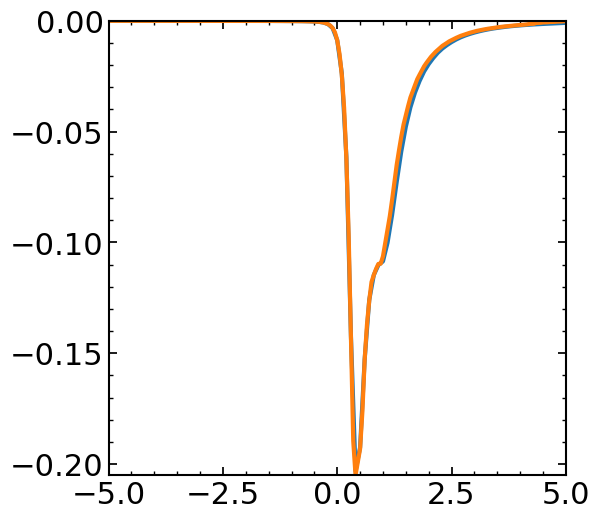

In [72]:
plt.plot(erange1, imag(df1['S']['AQ'][:, 0]))
plt.plot(erange, imag(df2['S']['AQ'][:, 0]))

In [73]:
df1.keys()

<KeysViewHDF5 ['A', 'G2', 'Q', 'S', 'TM', 'TMtot', 'X']>

In [74]:
df2.keys()

<KeysViewHDF5 ['A', 'Q', 'S', 'TM', 'TMtot', 'X']>

[]

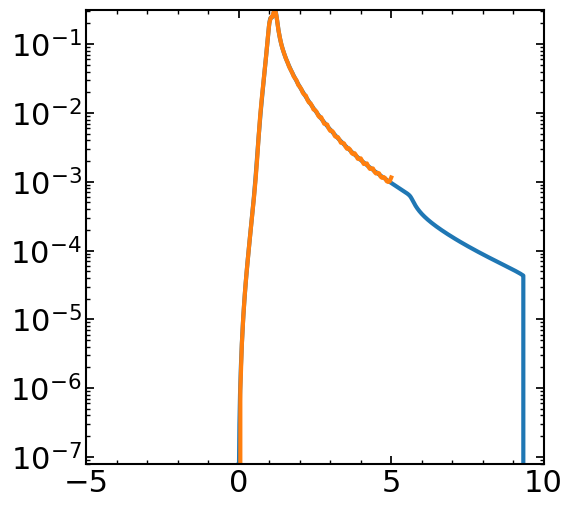

In [75]:
plt.plot(erange2b, -imag(df1['TMtot']['QA'][:, 100]))
plt.plot(erange, -imag(df2['TMtot']['QA'][:, 20]))

plt.semilogy()

### Reproducing the self-energy using different Particle interpolators

In [76]:
mQ = 0.6304819523093321

In [77]:
qrange = linspace(0, 5, 51)

In [78]:
erange1

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [79]:
pt = QuarkTM.Particle(mQ, qrange, erange1)

In [80]:
erange_dense = linspace(-5, 5, 1501)

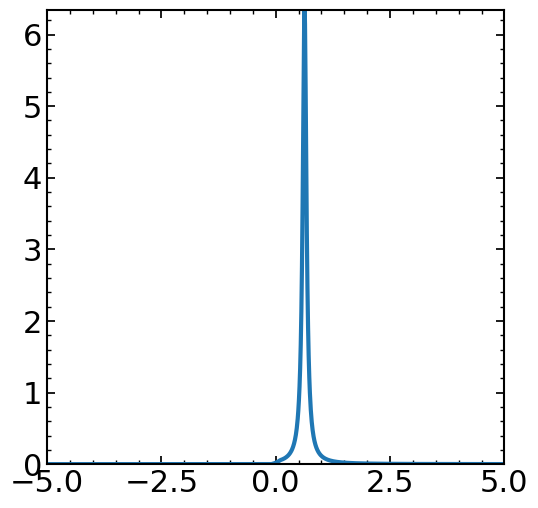

In [81]:
plt.plot(erange_dense, [pt.R(0, e) for e in erange_dense])

In [82]:
iImTot = tm.Interpolator2D(qrange2b, erange2b, ascontiguousarray(imag(df1['TMtot']['QA'])))

In [83]:
df2['TMtot']['QA'].shape

(201, 51)

In [84]:
erange.shape, qrange.shape

((201,), (51,))

In [85]:
iImTot_old = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(df2['TMtot']['QA'])))

In [86]:
T = 0.17

In [87]:
iEps = tm.Interpolator(qrange, pt.om0(qrange), 'cubic')

In [88]:
ss = array([tm.sigma_ff_onshell(e, 0, T, iImTot, pt.R, iEps, iEps) for e in erange])

In [89]:
ss_old = array([tm.sigma_ff_onshell(e, 0, T, iImTot_old, pt.R, iEps, iEps) for e in erange])

In [90]:
R_old = tm.Interpolator2D(qrange, erange1, ascontiguousarray(imag(-1/pi*pt.Gtab)))

In [91]:
ss_old2 = array([tm.sigma_ff_onshell(e, 0, T, iImTot_old, R_old, iEps, iEps) for e in erange])

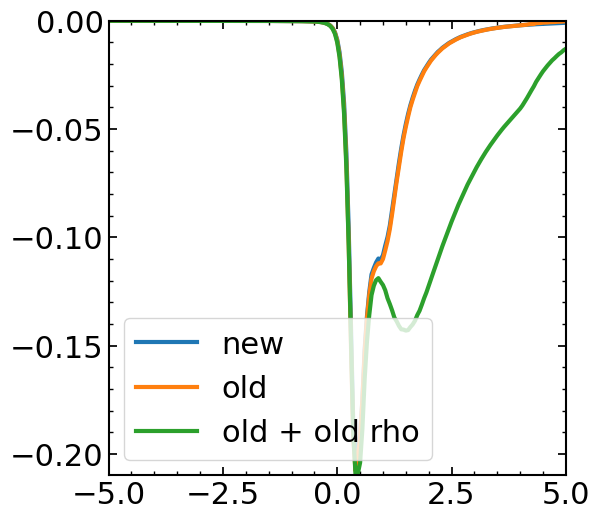

In [92]:
plt.plot(erange, ss, label='new')
plt.plot(erange, ss_old, label='old')
plt.plot(erange, ss_old2, label='old + old rho')


plt.legend()
# plt.plot(erange1, imag(df1['S']['AQ'][:, 0]))
# plt.plot(erange, imag(df2['S']['AQ'][:, 0]))